# 概述

## 集成算法概述

集成算法即构建多个模型进行学习。

目标：集成算法考虑多个评估器的建模结果，汇总后得到一个综合的结果，**以此来获取比单个模型更好的回归或分类的表现**。

多个模型集成的模型称为**集成评估器**，其中每个单独的模型被称为**基评估器**。通常有三种集成算法：装袋法（bagging），提升法（boosting）和stacking。

**Bagging**：构建多个相互独立的评估器，对预测进行平均或多数表决原则来决定集成评估器的结果。代表为随机森林。

**Boosting**：基评估器是相关的，按顺序一一构建。核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。或者说有意地将前一个评估器中预测错误的样本尽可能多地纳入下一个评估器，以此提高预测水平。代表有GBDT和Adaboost。

![avatar](https://quantdare.com/wp-content/uploads/2016/04/bb3.png)

## sklearn中的集成算法

sklearn中的集成算法在ensemble中。

# RandomForestClassifier

## 重要参数

### 控制基评估器（决策树）参数

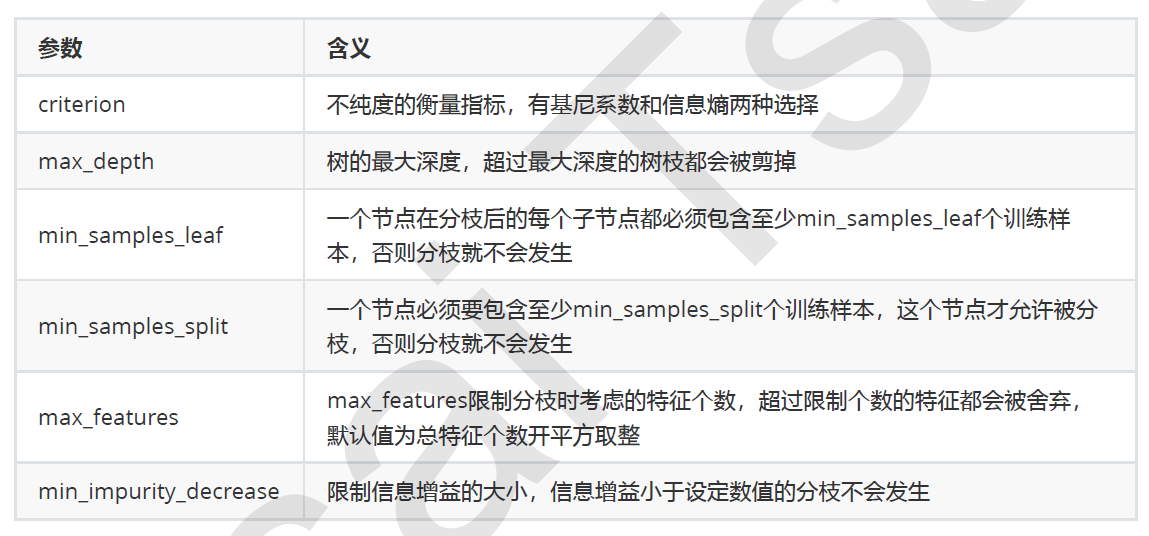

### n_estimators

森林中决策树的数量，越大效果越好，达到一定数值开始围绕某个精确度上下波动。需要在训练难度和模型效果中取得平衡。

In [8]:
#导入包
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine=load_wine()
wine.data.shape

(178, 13)

In [3]:
wine.target.shape

(178,)

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data
                                               ,wine.target
                                               ,test_size=0.2
                                               ,random_state=0
                                               )

In [5]:
# 实例化
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
# 训练实例化的模型fit
clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)
# 使用其他接口将测试集导入训练好的模型，获取希望得到的结果
score_clf = clf.score(Xtest, Ytest)
score_rfc = rfc.score(Xtest, Ytest)
# print("决策树的分数为：", score_clf,"\n随机森林的分数为：", score_rfc)
print("Single Tree:{}".format(score_clf)
     ,"\nRandom Forest:{}".format(score_rfc))

Single Tree:0.9722222222222222 
Random Forest:0.9722222222222222


In [9]:
# 交叉验证cross_val_score
# 目的：测试模型在不同训练集与测试集上的稳定性
# 方法：将特增矩阵划分为n份，依次取每一份作为测试集，其余n-1份作为训练集，多次训练来观测模型的稳定性
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=25
                            ,random_state=0
                            )
score_rfc = cross_val_score(rfc
                         ,wine.data
                         ,wine.target
                         ,cv=10
                         )
clf = DecisionTreeClassifier(random_state=0)
score_clf = cross_val_score(clf
                           ,wine.data
                           ,wine.target
                           ,cv=10)
plt.plot(range(1,11),score_rfc,label="Random Forest")
plt.plot(range(1,11),score_clf,label="Decision Tree")
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Random Forest
0.9722222222222221
Decision Tree
0.8483660130718954


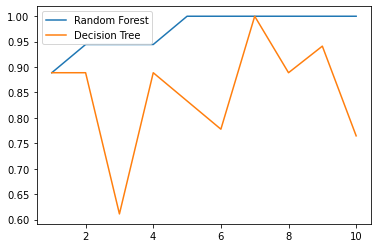

In [12]:
# 用循环实现上个cell的过程
label = "Random Forest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model
                           ,wine.data
                           ,wine.target
                           ,cv=10)
    print("{}".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label=label)
    plt.legend()
    label="Decision Tree"

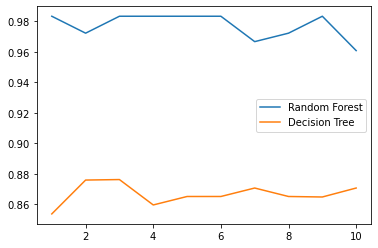

In [13]:
# 十组交叉验证下随机森林与决策树评分的对比
# 这一步骤在研究中一般不需要
clf_l = []
rfc_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=40,n_jobs=-1)
    rfc_s = cross_val_score(rfc
                           ,wine.data
                           ,wine.target
                            ,n_jobs=-1
                           ,cv=10
                           ).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf
                           ,wine.data
                           ,wine.target
                            ,n_jobs=-1
                           ,cv=10
                           ).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label="Random Forest")
plt.plot(range(1,11),clf_l,label="Decision Tree")
plt.legend()

0.9888888888888889 39


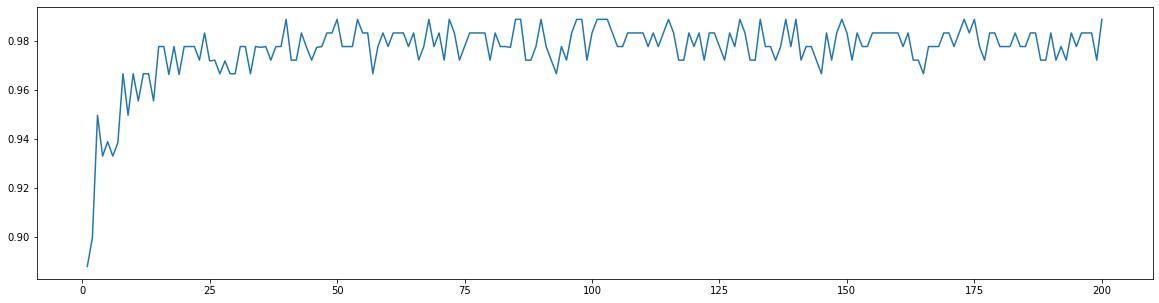

In [33]:
# 绘制学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10,n_jobs=-1).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1) #注意，python中index从0开始算，index后要加1才是estimator的数量
plt.figure(figsize=[20,5]) # 画布的长、宽
plt.plot(range(1,201),superpa)

### random_state

与决策树中的random_state不同，随机森林中的random_state控制的是森林中不同决策树组合的随机性，而非控制决策树的随机性。由于随机森林中的决策树各不相同，因此通过随机森林的集成算法，其性能要远远高于单个决策树。

假设在一个分类的实验中，我们建立了一个包含25棵决策树的随机森林。那么对任何一个样本，只有其中的13棵树及以上判断错误，随机森林才可能出错。假设单棵决策树判断出错的概率为$\varepsilon=0.2$，那么这片随机森林判断出错的概率为：

$e_{random\_forest}=\sum_{i=13}^{25}C_{25}^{i}  \varepsilon^i(1-\varepsilon)^{25-i}$

In [4]:
import numpy as np
from scipy.special import comb
e=0.2
n_trees=25
error_forest=np.array([comb(n_trees,i)*(e**i)*((1-e)**(n_trees-i)) for i in range(13,n_trees+1)]).sum()
print("决策树的正确率：{}%".format((1-e)*100),
     "\n随机森林的正确率：{}%".format((1-error_forest)*100))

决策树的正确率：80.0% 
随机森林的正确率：99.96309519654442%


In [14]:
#具体看一下random_state的作用
rfc_0 = RandomForestClassifier(n_estimators=5, random_state=0)
rfc_1 = RandomForestClassifier(n_estimators=5, random_state=1)
rfc_0.fit(Xtrain, Ytrain)
rfc_1.fit(Xtrain, Ytrain)

for i in [rfc_0, rfc_1]:
    print(str(i)+"中决策树的random_state是：")
    for j in range(len(i.estimators_)):
        print(i.estimators_[j].random_state) #此处必须写循环，因为sklearn中模型的属性是sklearn中特有的数据类型，无法直接通过pandas等导出

RandomForestClassifier(n_estimators=5, random_state=0)中决策树的random_state是：
209652396
398764591
924231285
1478610112
441365315
RandomForestClassifier(n_estimators=5, random_state=1)中决策树的random_state是：
1791095845
2135392491
946286476
1857819720
491263


### bootstrap & oob_score

一般来说，一片随机森林中决策树的随机性越大，随机森林的效果越好。一个让基分类器尽量都不一样的方法是使用不同的训练集对基分类器进行训练，即通过控制***有放回的随机抽样技术***可以达到此目的。这就需要用到参数***bootstrap***。

booststrap的基本思路如下：
<br>一个袋子里装了5个球，每次从袋子中取出一个球，一共取5个，组成一个训练集（我们称之为自主集）；这样就可以取出众多不同的训练集对基分类器进行训练。
<br>图示如下：
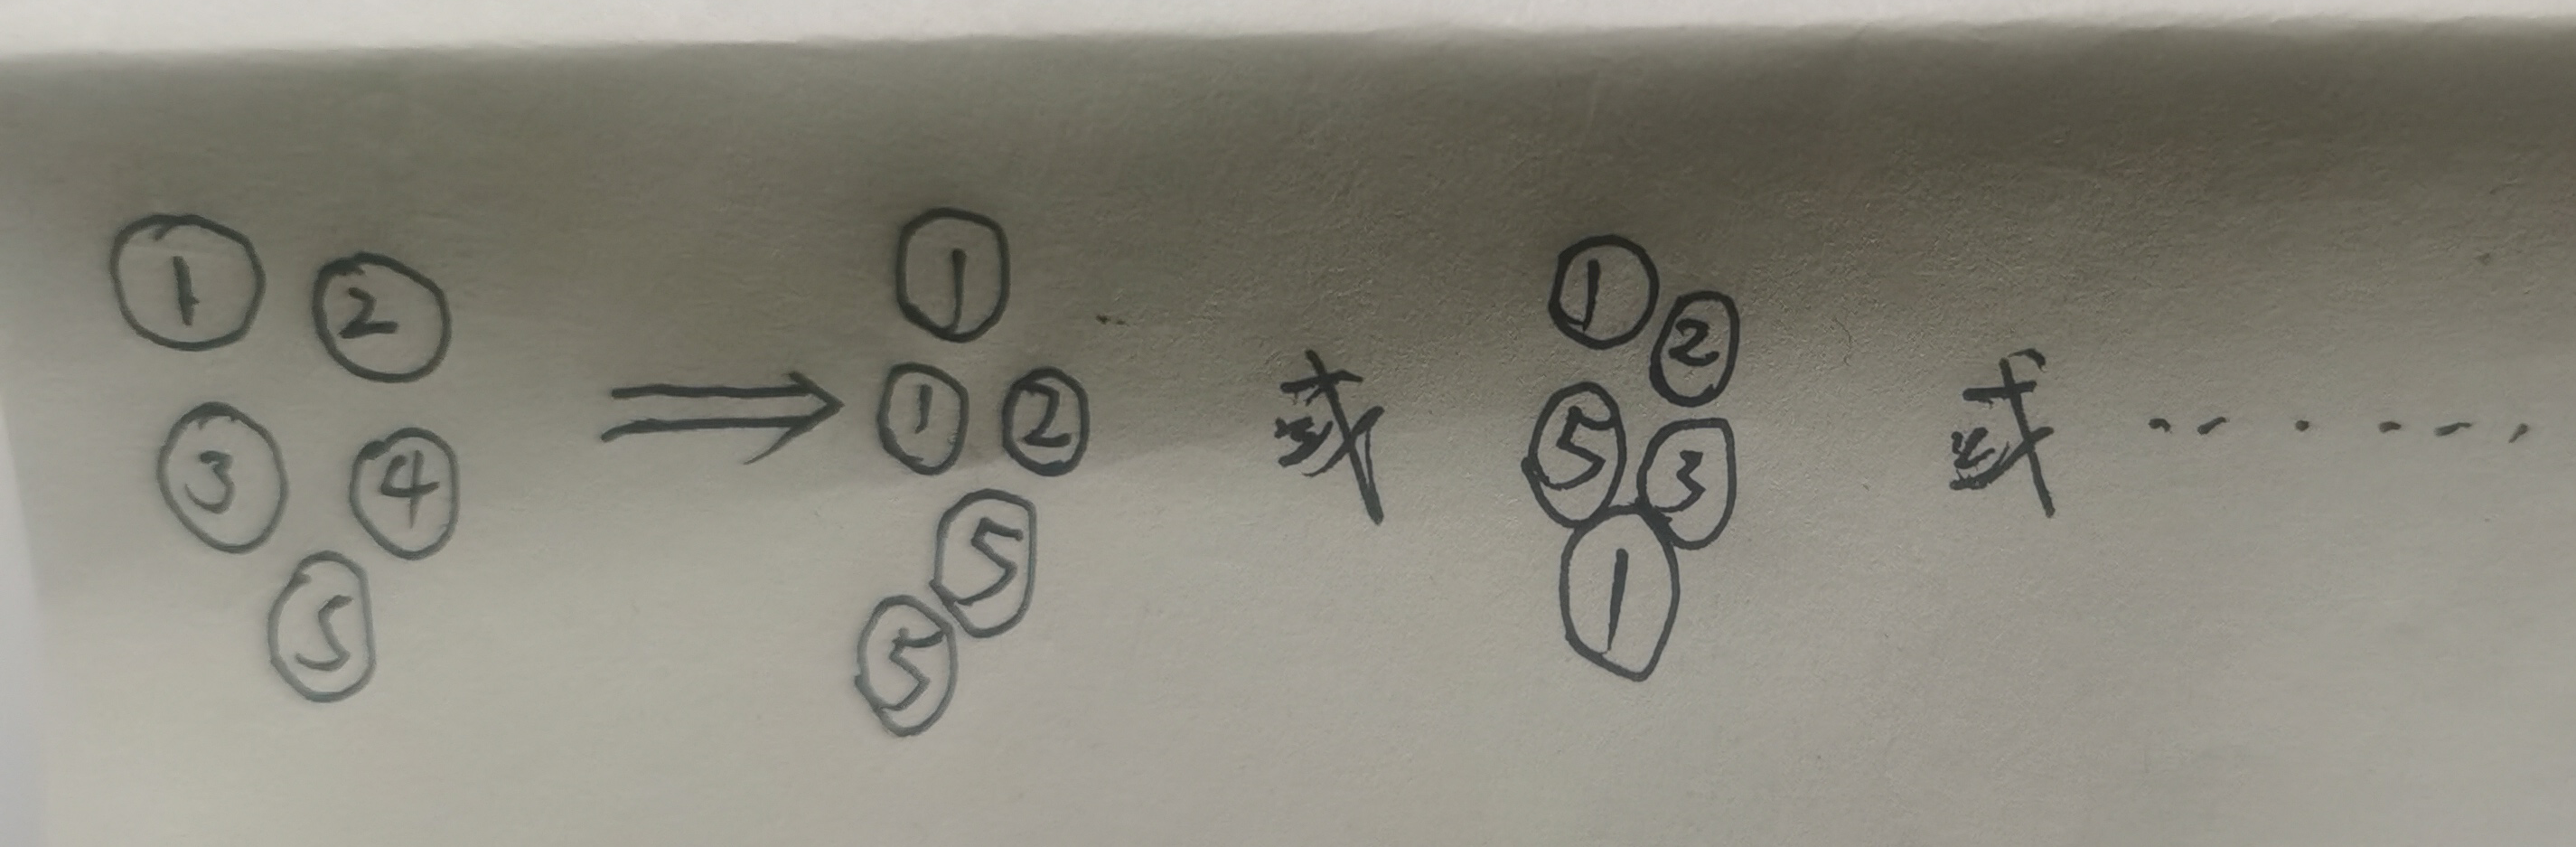

In [15]:
# 十组交叉验证下对比bootstrap
rfc_0 = RandomForestClassifier(n_estimators=40,n_jobs=-1, bootstrap=False, random_state=0)
rfc_0_s = cross_val_score(rfc_0, wine.data ,wine.target ,n_jobs=-1 ,cv=10).mean()

rfc_1 = RandomForestClassifier(n_estimators=40,n_jobs=-1, bootstrap=True, random_state=0)
rfc_1_s = cross_val_score(rfc_1, wine.data ,wine.target ,n_jobs=-1 ,cv=10).mean()

print("bootstrap=False时随机森林的分数：{}".format(rfc_0_s),
      "\nbootstrap=True时随机森林的分数：{}".format(rfc_1_s))

bootstrap=False时随机森林的分数：0.9722222222222221 
bootstrap=True时随机森林的分数：0.9833333333333332


根据有放回的随机抽样思想，包含n个样本的原始数据中每个样本被抽中的概率为：
$1-(1-\frac{1}{n})^n$，当n足够大的时候，这个概率收敛到$1-\frac{1}{e}$，约等于0.632。因此通过有放回的随机抽样技术，数据集会有大概37%左右的数据被浪费掉，这些数据被称为**袋外数据(out of bag data, oob)**。

这些数据由于在训练中并没有被用到，因此，除了我们事先通过train_test_split划分好的测试集外，我们还可以将ood用于测试。也就是说当样本量和基评估器数量足够大时，如果使用随机森林，我们完全可以不单独划分训练集和测试集。**根据Leo Breiman的解释，oob相对于cv更能节省算力，且对数据量要求较小。一般来说，oob更适用于小数据集难以有效划分情况。**（因为如果数据量较小，将数据划分为10份左右，每一份样本量会更小，从而影响cv的结果）

如果希望使用oob作为测试集，那么在实例化时需要将参数oob_score的值设置为True（其默认值为False）。训练完毕后，我们可以通过属性oob_score_来查看在袋外数据上测试的结果。

In [16]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc.fit(wine.data,wine.target)
#重要属性oob_score_
rfc.oob_score_

0.9662921348314607

In [19]:
rfc.oob_decision_function_ [0,:]
#返回通过oob进行训练的各个样本的决策概率，在此示例中，每一列分别代表不同酒的种类
#返回结果同predict_proba返回结果类似

array([1., 0., 0.])

## 重要属性和接口

略

# 附录：Bonus——Bagging的另一个必要条件

Bagging的一个必要条件是各个基分类器要尽量独立。除此之外，还需要要求基分类器的判断准确率至少要高于随机分类器，及高于50%。可以从一下代码看到，如果基分类器的判断正确率低于0.5，那么bagging集成算法的性能会低于基分类器性能。

In [5]:
import numpy as np
from scipy.special import comb
e=0.6 #基分类器的误判率
n_trees=25 #基分类器的个数
error_forest=np.array([comb(n_trees,i)*(e**i)*((1-e)**(n_trees-i)) for i in range(13,n_trees+1)]).sum()
print("决策树的正确率：{}%".format((1-e)*100),
     "\n随机森林的正确率：{}%".format((1-error_forest)*100))

决策树的正确率：40.0% 
随机森林的正确率：15.376776897576294%


进一步，我们可以画出基分类器错误率e与其相对应的bagging集成算法错误率E之间关系的图像。

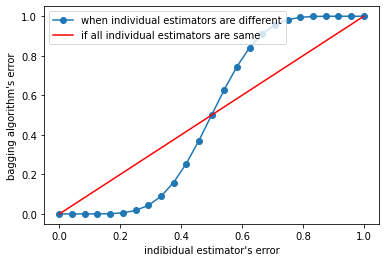

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,1,25) #设置基分类器错误率的范围

n = 15 #设置基分类器的个数
m = math.ceil(n/2) #向上取整，设置集成算法判断正确的阈值，
                    #即大于等于m个基分类器判断正确时，
                    #集成算法判断正确

y = []
for e in x:
    E = np.array([comb(n,i)*(e**i)*((1-e)**(n-i))
                 for i in range(m,n+1)]).sum()
    y.append(E)
    
plt.plot(x,y, "-o", label="when individual estimators are different")
plt.plot(x,x, "-",color="red", label="if all individual estimators are same")
plt.xlabel("indibidual estimator's error")
plt.ylabel("bagging algorithm's error")
plt.legend()